# Feature Selectio Using Lasso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
x = df.iloc[:, 0:-1]
y = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1)
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [9]:
scalor = StandardScaler()

columns = x_train.columns

x_trained_scaled = scalor.fit_transform(x_train)
x_test_scaled = scalor.transform(x_test)
x_trained_scaled = pd.DataFrame(x_trained_scaled, columns=columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=columns)

x_trained_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222


In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.1)
lasso.fit(x_trained_scaled, y_train)

Lasso(alpha=0.1)

In [12]:
lasso.coef_

array([ 0.        ,  0.1267733 , -0.        ,  0.        ,  0.        ,
        0.00480181,  0.        ,  0.        ])

<Axes: >

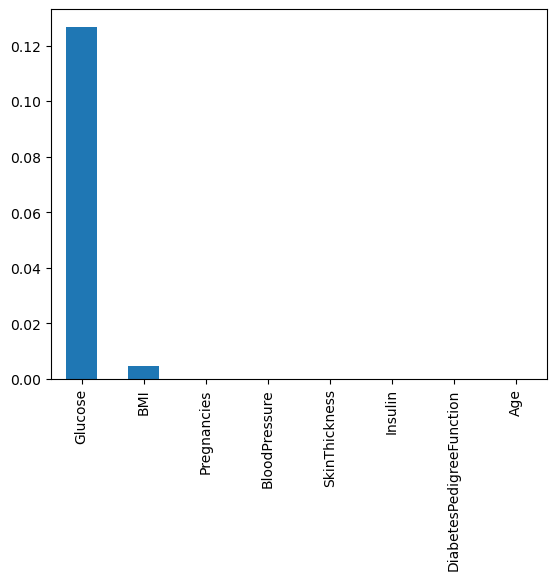

In [17]:
cls = pd.Series(np.abs(lasso.coef_), index=columns)
cls.sort_values(ascending=False).plot(kind="bar")

# Feature Selection Using Decision Trees